# Corriendo en las escaleras

- [Link al ejercicio en CS Academy](https://csacademy.com/ieeextreme-practice/task/96c8b1313edd72abf600facb0a14dbab/)
- [Este mismo problema en Geeks For Geeks](https://www.geeksforgeeks.org/count-ways-reach-nth-stair/)

## Enunciado

>Every 12-year-old boy (at least in America) feels the need to run up the stairs skipping some of them. For this problem, we are going to assume that he randomly skips single steps. (with each step of his foot, he may land on the next step or he may skip one step and land on the following step). For example, if there are three steps, he could traverse them three ways:
>
> The challenge in this problem is: given a number of stairs, calculate the number of ways he could traverse them.

### En castellano

Estamos al pie de la escalera y queremos contar la cantidad de formas en las que podemos trepar al último escalón.
- Podemos ir escalon por escalon.
- Podemos saltearnos uno.

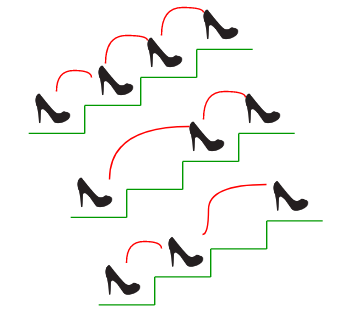

### El Input

primer linea: un integer $t$, con $ 1 \leq t \leq 5$.
Luego, $t$ lineas con un integer $n$ cada una. $n$ en $1 \leq n \leq 22000$.

### El Output

Para cada instancia de input, tenemos que imprimir un integer con la cantidad de formas en las que podemos subir al ultimo escalon.

## Analicemos el problema

Los ejemplos nos dan una pista de los resultados para valores chicos:

| Cantidad de pasos | cantidad de combinaciones |
|--|--|
| 1 | 1 |
| 2 | 2 |
| 3 | 3 |
| 5 | 8 |

De los intervalos de $t$ y $n$ podemos ver:
- Vamos a tener que tener cuidado con $n$, porque puede tener un valor grande.
- Nos van a dar hasta 5 instancias. ¿En algun lugar del problema vamos a tener que lidiar con repeticion?


### Probando algunos casos hasta encontrar la formula general
- Si tengo que subir al primer escalon, no hay vuelta que darle, una sola manera.
- Si tengo que subir al segundo escalon, puedo subirme al primero y despues al segundo, ó al segundo de una.
- Si tengo que subirme al tercero, puedo subirme al primer escalon y ver como subo dos mas, ó subirme al segundo y depues subir uno mas.

Esa idea recursiva nos re sirve:
$$
f(3) = f(2) + f(1) \\
f(4) = f(3) + f(2) \\
\vdots \\
f(n) = f(n - 1) + f(n - 2)
$$

Nos queda Fibonacci.

In [16]:
memoria = {}

def cantidad_de_combinaciones(n):
    global memoria

    if n in memoria:
        return memoria[n]

    if n <= 1:
        return 1
    else:
        ans = cantidad_de_combinaciones(n-1) + cantidad_de_combinaciones(n - 2)
        memoria[n] = ans
        return ans

In [20]:
cantidad_de_combinaciones(10000)

RecursionError: ignored

### ¿Cómo que Stack Overflow? Python no es recursivo.

Para los que vienen de otro lenguaje, la solucion recursiva de este problema les debe sonar mucho. El problema es que python es un lenguaje que no soporta llamados recursivos.

En lugar de calcular nuestra respuesta de arriba a bajo, vamos a calcularla de abajo hacia arriba:

$$
acc_{i - 1} = 1\\
Acc_i = 2
$$

Invariante:

Luego de cada iteración, vale que:

$$
\mathtt{acc\_i} = F(i) \\
\mathtt{acc\_i\_menos\_uno} = F(i - 1)
$$

Entonces, cuando cortamos el ciclo, vale que:
$$
i = n \Rightarrow F(i) = F(n)
$$

Por lo tanto `acc_i` es el resultado que queremos mostrar.

In [21]:
def cantidad_de_combinaciones(n):

    acc_i_menos_uno = 1
    acc_i = 2
    i = 2

    while i < n:
        i = i + 1
        acc_i, acc_i_menos_uno = acc_i + acc_i_menos_uno, acc_i
    
    # Se corta cuando i == n
    # acc_i == F(i) == F(n) que es el valor buscado

    return acc_i

In [26]:
%time
cantidad_de_combinaciones(10000)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


6276302800488957086035253108349684055478528702736457439025824448927937256811663264475883711527806250329984690249846819800648580083040107584710332687596562185073640422286799239932615797105974710857095487342820351307477141875012176874307156016229965832589137779724973854362777629878229505500260477136108363709090010421536915488632339240756987974122598603591920306874926755600361865354330444681915154695741851960071089944015319300128574107662757054790648152751366475529121877212785489665101733755898580317984402963873738187000120737824193162011399200547424034440836239726275765901190914513013217132050988064832024783370583789324109052449717186857327239783000020791777804503930439875068662687670678802914269784817022567088069496231111407908953313902398529655056082228598715882365779469902465675715699187225655878240668599547496218159297881601061923195562143932693324644219266564617042934227893371179832389642895285401263875342640468017378925921483580111278055044254198382265567395946431803304304326865077

### Ahora, ¿Se la banca con $n = 22000$?

Nuestro primer intento de resolver este problema, falló al superar la máxima recursión permitida. Ya eliminamos la recursión, ¿Vamos a poder calcular el valor máximo de $n$ para este problema?

In [27]:
cantidad_de_combinaciones(22000)

3868905639227615662958536976200683139906993307076649148079474581713447022674942339227106749341086326947815156526226364383313410040469497793812249018397971593170054565518258767360237548641110508180813356412632182420521980743878359754768174794274410414338994217522093391242963175912771525307645308193550665982142322180437956727748275167883467037955970038477107668473501994430440196758671158873122898283031324038767433966106875340549421774040506794344686741587715549675566026498955657218115327209743212947344277270099232550939213033867109428532330663583254185729833343696235890495974205201884141339783678384073845007940944008814130471886335123121643721638145144888632052686837388517492816077693974867653807717840034553172106683469944195565168030856831551175911134812619492519851151167844581437166662778594893268450747077196246583672033809584552981646376911895356214623672022676113503207835874464939699748518750896375378241458771775044123608825987125866561901368211944680071363223077696324597218851325198

Se puede calcular un número así de grande porque Python tiene /Big Integers/. No son lo mas eficiente para calculos con números pequeños, pero la tranquilidad de saber que no vamos a superar la capacidad máxima, como nos puede pasar con Java o C, nos va a ayudar un monton para escribir nuestras soluciones durante la competencia.